# **Detecting Parkinson’s disease from short speech recordings**

Name: Sotirios Damas

Student ID: 40317602

## **Abstract**

  Parkinson’s disease (PD) often causes hypokinetic dysarthria, altering prosody, phonation, and articulation. This study investigates automatic PD detection from short speech recordings using three neural architectures in the SpeechBrain toolkit [5]: an X-vector Time-Delay Neural Network (TDNN), an ECAPA-TDNN, and a fine-tuned wav2vec2-base model. All models were trained and evaluated on an Italian corpus (65 speakers, 831 utterances) and, for vowel-only experiments, on a subset (50 speakers, 495 utterances). The X-vector TDNN achieved the best in-language performance (0–2.3% test error; ≈98% accuracy). Cross-language generalization was tested on the Czech vowel /a/ dataset (81 speakers): applying the Italian-trained wav2vec2 model directly yielded ≈45% error, and training a fresh TDNN on the small Czech dataset reached ≈56% error, which highlights the challenge of cross-language transfer when data are scarce. These results demonstrate that, although neural models can detect PD from speech with high accuracy in a known language, robust performance on new languages demands careful strategies and more diverse data.


## **Introduction**

Parkinson’s Disease is a neurodegenerative disorder affecting over 10 million people worldwide. Beyond motor symptoms, PD frequently causes speech impairments in about 89% of patients. These speech deficits(a form of hypokinetic dysarthria) include reduced pitch variation, low volume or hoarse voice quality, imprecise articulation, and altered speech rate. Because these vocal changes often emerge early in PD, voice analysis has been proposed as a non-invasive biomarker for detection and monitoring.[1][9]

Numerous studies have used acoustic features such as jitter, formants, and MFCCs with machine-learning classifiers to distinguish PD from healthy speech, reporting accuracies from roughly 65% to over 90% depending on disease severity and tasks. Recent advances in deep learning have led to neural models that learn discriminative speech patterns automatically.[7] In particular, speaker recognition techniques like X-vector embeddings from TDNNs, have shown up to a 15% accuracy gain over classical MFCC-GMM baselines.[2] Similarly, the more advanced ECAPA-TDNN architecture incorporates channel attention and Res2Net modules within the x-vector framework. This allows it to capture rich speech characteristics, and it has outperformed prior TDNN systems in speaker verification tasks.[3] Another promising approach is leveraging self-supervised learning models such as wav2vec 2.0, which are pre-trained on large speech corpora to learn general speech representations.[4][8]
Fine-tuning such models for PD detection may yield robust features that generalize well. Wav2vec in particular has demonstrated strong cross-language generalization in speech recognition and even in paralinguistic tasks, suggesting it could help build language-agnostic PD detectors.

Despite these advances, a key challenge is generalizability across different languages and recording conditions. Models trained on one language may degrade when applied to another due to phonetic and acoustic differences.[6] For widespread clinical utility, PD detection models should maintain accuracy on unseen languages or datasets. In this project, three state-of-the-art neural models (X-vector TDNN, ECAPA-TDNN, and wav2vec2) were trained on an Italian PD corpus and evaluated both on the Italian test set and on a Czech vowel dataset. The resulting error increases confirm that cross-language transfer remains unresolved and point to the need for multilingual and data-efficient strategies in future work.

In addition to Parkinson’s disease, speech-based machine-learning and deep-learning approaches have shown promise in detecting other neurological conditions characterized by vocal impairments, including Alzheimer’s disease, concussions, and essential tremor. Similar acoustic feature extraction methods and neural network architectures have been extensively applied in Alzheimer’s research to identify early vocal biomarkers associated with cognitive decline [10]. Likewise, vocal biomarkers are increasingly being studied for concussion assessment and essential tremor differentiation, offering rapid, non-invasive screening tools. Investigating these related neurological conditions helps broaden our understanding of how brain disorders manifest acoustically and may inform the selection of robust features and effective training methodologies. Ultimately, such insights could enhance the performance, generalizability, and clinical applicability of speech-based diagnostic tools for Parkinson’s and other neurological diseases.

## **Methodology**
The goal of this project is binary classification of speech recordings to detect Parkinson's Disease (PD) versus Healthy Controls (HC). Three neural architectures were explored, implemented using the SpeechBrain toolkit:

**1. X-vector Time-Delay Neural Network (TDNN):**

- Utilizes mel filter-bank features (40-dimensional) computed from 16 kHz audio, normalized globally.

- Consists of five TDNN layers with increasing dilation factors, followed by a statistics pooling layer (mean and standard deviation) to produce fixed-length embeddings.

- Embeddings (128-dim) pass through one linear block to the final softmax classifier for PD vs. HC classification.

- Model dimensions were reduced (TDNN channels: [128,128,128,128,375]) to prevent overfitting.

- The model was trained with cross-entropy loss (nll_loss) optimized using Adam, with linear learning rate decay from 0.001 to 0.0001 over 20 epochs.



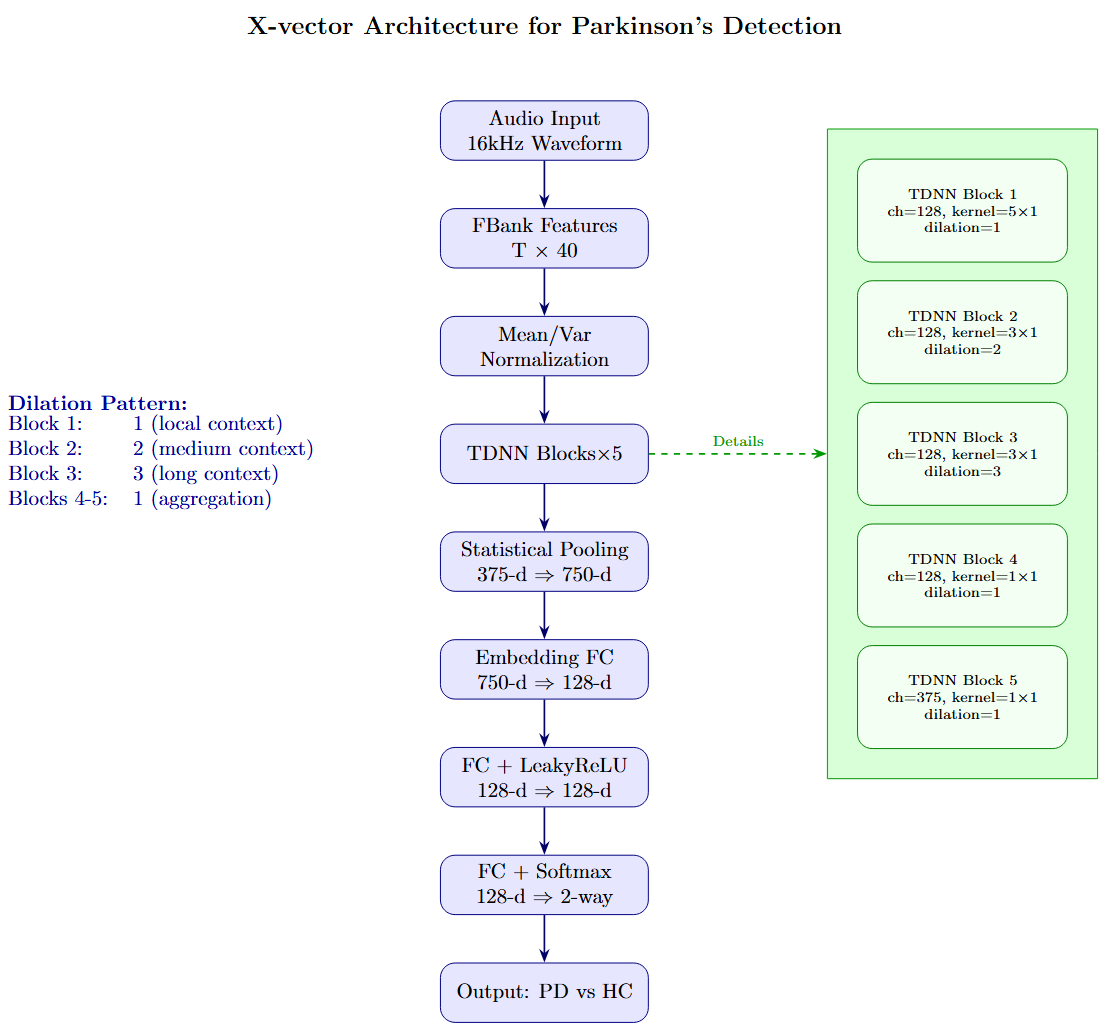

**2. ECAPA-TDNN:**

- Employs similar 40-dimensional mel filter-bank features, normalized per utterance (sentence-wise).

- Integrates Res2Net-inspired blocks and channel attention to capture richer, more nuanced features.

- The architecture used smaller channel dimensions ([128,128,128,128,384]) and an embedding size of 192 dimensions to reduce complexity and minimize overfitting.

- Additive Angular Margin Softmax (AAM-Softmax) loss was used, with Adam optimizer and a linear scheduler decaying from 0.0001 to 0.00001 over 25 epochs.



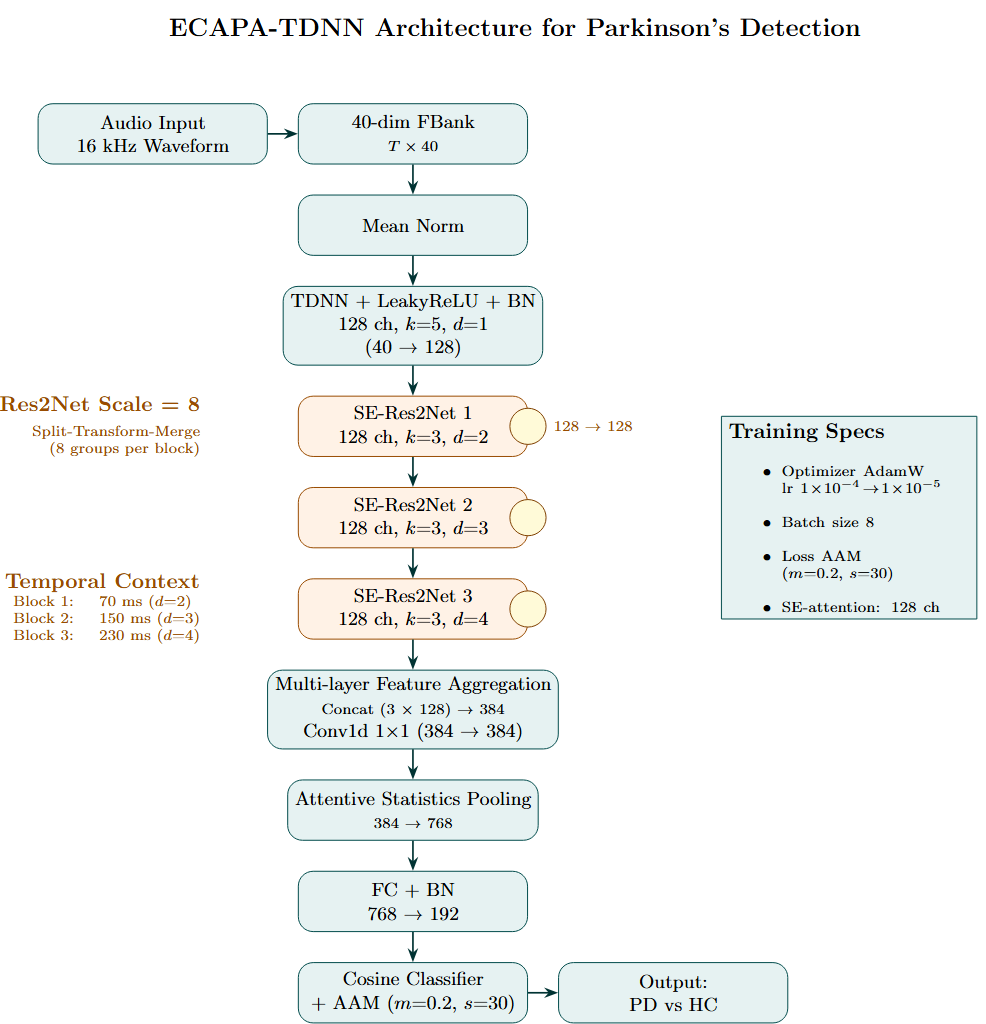

**3. Wav2Vec2 Fine-tuning:**

- Leveraged a pre-trained multilingual Wav2Vec2 base encoder (Facebook's wav2vec2-base) to generate speech embeddings.

- Raw 16 kHz audio inputs were fed directly into the SSL model without additional feature extraction.

- The convolutional feature‐extractor layers remained frozen throughout training to preserve low-level representations; only the Transformer encoder layers and the classification head were fine-tuned.

- Statistical average pooling condensed variable-length embeddings to fixed-length vectors, passed through a linear classifier (two neurons).

- Model training utilized mixed-precision (fp16) and reduced batch sizes (1 on the full dataset and 2 on the smaller vowel subset) due to GPU memory constraints.

- SSL layers had lower learning rate (1e-5) compared to classifier head (1e-4) to fine-tune cautiously without losing general features.

- Trained for 10 epochs.




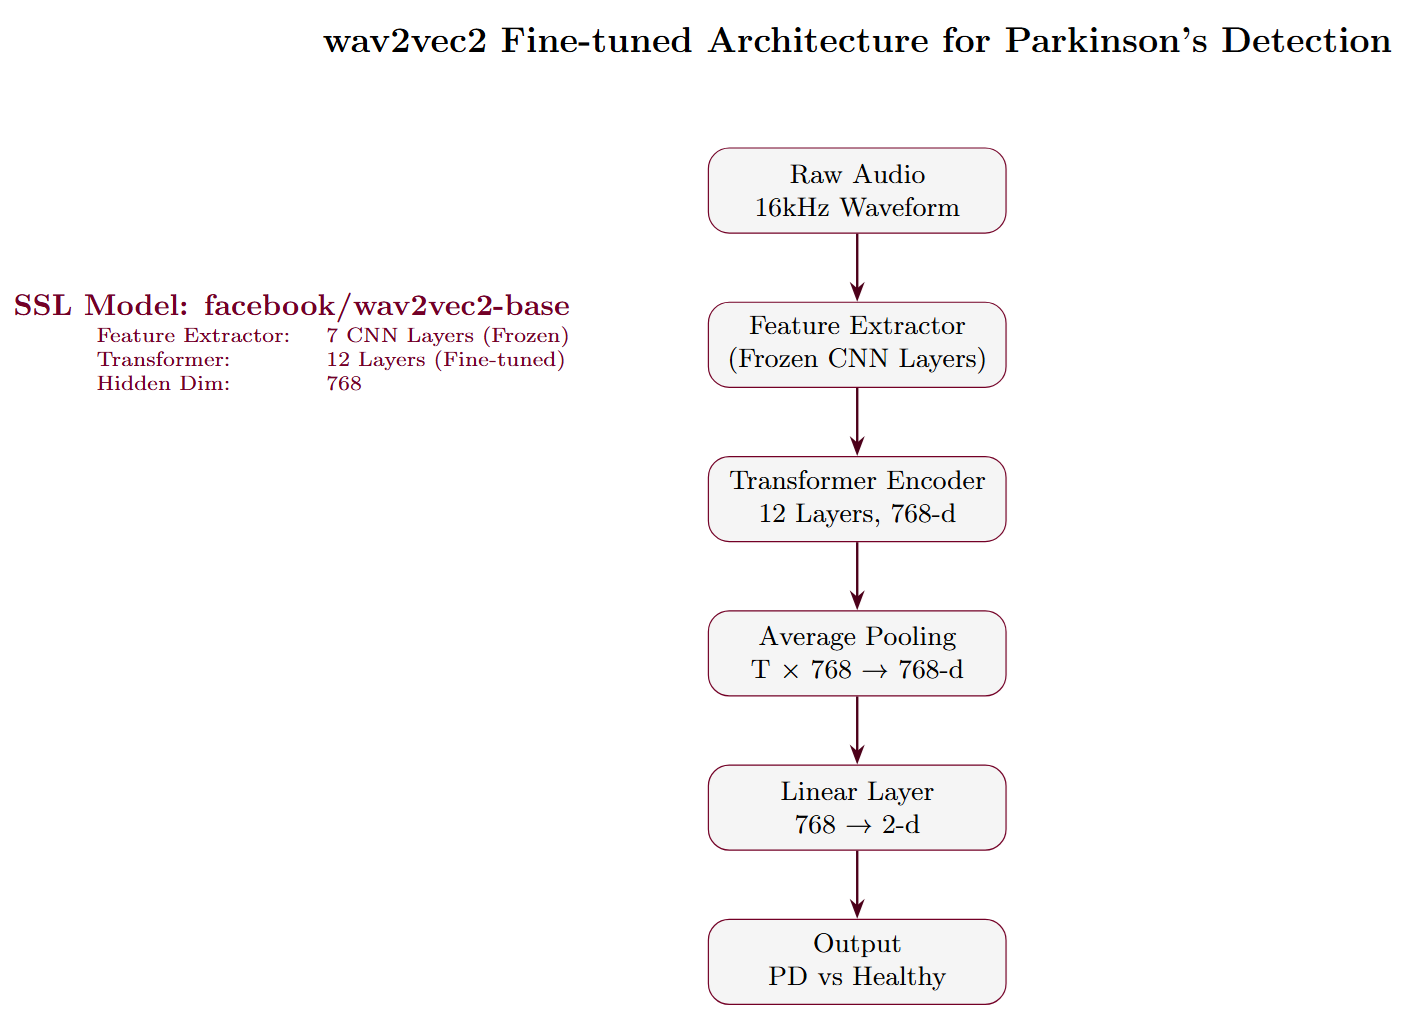

**Originality and Relation to Existing Work:**

While previous works have utilized similar architectures individually, this project uniquely applied and directly compared these three state-of-the-art methods (X-vector TDNN, ECAPA-TDNN, Wav2Vec2 fine-tuning) specifically for PD detection using short phoneme-based speech tasks. The projects's novelty also lies in evaluating cross-language performance explicitly, highlighting challenges in multilingual generalization, an issue frequently overlooked in prior PD-related speech research.

## **Experimental Setup**


### Dataset Overview

| Dataset                   | Language | Samples | Speakers (PD / HC) | Tasks                     |
|---------------------------|----------|---------|--------------------|---------------------------|
| Italian (full)            | Italian  | 831     | 65 (28 / 37)       | Reading, syllables, vowels|
| Italian (vowels only)     | Italian  | 495     | 50   (28 / 22)              | Sustained vowel phonation |
| Czech (vowel /a/)         | Czech    | 81      | 81 (40 / 41)       | Sustained vowel /a/       |


### Dataset Details

 I used two main datasets in this project, one for training and primary evaluation, and another for cross-language testing:

- [Italian Parkinson’s Voice and Speech Dataset](https://huggingface.co/datasets/birgermoell/Italian_Parkinsons_Voice_and_Speech): This dataset consists of 831 recorded samples from 65 Italian speakers. The recordings are organized into category folders: “28 People with Parkinson's disease”, “15 Young Healthy Control” and “22 Elderly Healthy Control”, and were collected as part of a speech intelligibility study by Dimauro et al. (2017)[5252]. Speech tasks include two reading passages, repeated syllables (/pa/, /ta/ sequences), and sustained vowel phonations. Each speaker contributed multiple recordings (covering the different tasks). The audio is in WAV format, sampled at 16 kHz.

- [Czech PD Speech Dataset](https://figshare.com/articles/dataset/Voice_Samples_for_Patients_with_Parkinson_s_Disease_and_Healthy_Controls/23849127): To evaluate cross-lingual generalization, I used a smaller dataset of Czech speakers. It contains 81 recordings from 81 speakers(40 PD, 41 HC). All speakers in this database phonated the vowel /a/.

### Data Preparation Steps
**1. File Collection**

- Used SpeechBrain’s *get_all_files* function to recursively collect all .wav files from the dataset directory.

**2. Speaker Grouping and Labeling**

- Group files by speaker. In the provided implementation, the speaker ID is constructed by combining the classification label (derived from the category folder), the folder above the speaker name (this ensures uniqueness even when two speakers share the same name) and the speaker’s name (extracted from the subfolder).

- Assign each speaker a label based on their category: for example, speakers in “28 People with Parkinson's disease” are labeled as “PD” while those in “15 Young Healthy Control” or “22 Elderly Healthy Control” are labeled as “Healthy.”

**3. Speaker-Independent Split (70 / 15 / 15)**

- With random.seed(1986) for reproducibility, shuffle and split the set of PD speakers and the set of Healthy speakers separately into 70 % train, 15 % valid, 15 % test.

- Combine PD and Healthy splits to form the final Train/Valid/Test speaker lists.

- Stratification guarantees that each subset maintains the overall PD / Healthy ratio, and assertions confirm no speaker overlap across splits.

**4. JSON Manifest Creation**

- For each split (train, valid, test), iterate over the speakers and their corresponding files.

- Compute each audio file’s duration using torchaudio.info.

- Generate a JSON manifest where each key is a unique utterance ID (constructed from the speaker ID and the file name) and each value is a dictionary containing the file path, duration, speaker, and label.

- Save the manifests to disk. These JSON files are compatible with SpeechBrain recipes for subsequent model training and evaluation.

**5. Vowel-Only Subset Manifests**
The same preprocessing and manifest‐generation workflow was applied to both the Italian vowel-only subset and to the Czech vowel / a / corpus. For each case, dedicated JSON manifests were produced to enable controlled, phoneme-focused experiments across languages.



### Model Hyperparameters:

| Parameter                 | X-vector TDNN                  | ECAPA-TDNN                         | Wav2Vec2 fine-tune               |
|---------------------------|--------------------------------|------------------------------------|----------------------------------|
| **Feature Extraction**    | 40 mel-filter                  | 40 mel-filter                      | Raw waveform (SSL)               |
| **Embedding Dimension**   | 128                            | 192                                | 768 (encoder_dim)                |
| **Batch Size**            | 16                             | 8                                  | 1–2                              |
| **Optimizer**             | Adam                           | Adam                               | Adam (SSL and head separately)   |
| **Initial Learning Rate** | 0.001                          | 0.0001                             | SSL: 1e-5, Head: 1e-4            |
| **LR Scheduler**          | Linear                         | Linear                             | NewBob (plateau)                 |
| **Epochs**                | 20                             | 25                                 | 10                               |
| **Loss Function**         | Cross-entropy                  | AAM-Softmax                        | Cross-entropy                    |
| **Precision**             | fp32                           | fp32                               | Mixed fp16                       |


### Evaluation Metrics:

- Main evaluation metric: classification Error Rate (%), calculated as the percentage of misclassified utterances.

### Install speechbrain and download the datasets

In [1]:
%%capture
!git clone https://github.com/speechbrain/speechbrain.git
%cd speechbrain
!pip install -r requirements.txt
!pip install .
%cd ..

#### Download the Italian Parkinson's Voice and Speech Dataset

In [2]:
!pip install git-lfs
!git lfs install
!git clone https://huggingface.co/datasets/birgermoell/Italian_Parkinsons_Voice_and_Speech /content/data

Git LFS initialized.
Cloning into '/content/data'...
remote: Enumerating objects: 920, done.
remote: Counting objects: 100% (917/917), done.
remote: Compressing objects: 100% (917/917), done.
remote: Total 920 (delta 2), reused 0 (delta 0), pack-reused 3 (from 1)
Receiving objects: 100% (920/920), 199.61 KiB | 7.39 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Filtering content: 100% (832/832), 1.34 GiB | 56.61 MiB/s, done.


#### Download the Czech Parkinsonian Speech Dataset

In [3]:
!mkdir -p /content/data/czech
!wget -O /content/data/czech/dataset.zip "https://figshare.com/ndownloader/articles/23849127/versions/1"
!unzip -q /content/data/czech/dataset.zip -d /content/data/czech

--2025-04-26 03:24:54--  https://figshare.com/ndownloader/articles/23849127/versions/1
Resolving figshare.com (figshare.com)... 52.49.76.148, 54.154.255.4, 54.76.21.160, ...
Connecting to figshare.com (figshare.com)|52.49.76.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4378507 (4.2M) [application/zip]
Saving to: ‘/content/data/czech/dataset.zip’

/content/data/czech 100%[===================>]   4.17M  3.80MB/s    in 1.1s    

2025-04-26 03:24:56 (3.80 MB/s) - ‘/content/data/czech/dataset.zip’ saved [4378507/4378507]



In [4]:
!unzip -q /content/data/czech/HC_AH.zip -d /content/data/czech
!unzip -q /content/data/czech/PD_AH.zip -d /content/data/czech

### Preprocessing: Italian dataset

In [5]:
import os
import re
import json
import random
import torchaudio
from speechbrain.utils.data_utils import get_all_files
from sklearn.model_selection import train_test_split
random.seed(1986)

DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _speechbrain_save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _speechbrain_load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _recover


In [6]:
random.seed(1986)

data_root = "data/italian_parkinson"
categories = {
    "28 People with Parkinson's disease": "PD",
    "15 Young Healthy Control": "Healthy",
    "22 Elderly Healthy Control": "Healthy"
}

# Gather files grouped by speaker
speaker_files = {}
#data/italian_parkinson/22 Elderly Healthy Control/BRIGIDA C/D1BCRAISGS48F210320171004.wav
for category, label in categories.items():
    category_path = os.path.join(data_root, category)
    audiofiles = get_all_files(category_path, match_and=['.wav'])
    for file in audiofiles:
        # Extract speaker ID directly from path: it's the folder after category
        parts = file.split(os.sep)
        spk_name = parts[-2].replace(" ", "_")
        group_folder = parts[-3].replace(" ", "_")

        spk_id = f"{label}_{group_folder}_{spk_name}"

        speaker_files.setdefault(spk_id, {"label": label, "files": []})
        speaker_files[spk_id]["files"].append(file)

print(f" Found {len(speaker_files)} speakers.")
# Randomly split speaker IDs into train, valid, test (70%, 15%, 15%)
def split_speakers(speaker_list, train_ratio=0.70):
    random.shuffle(speaker_list)
    n_total = len(speaker_list)
    n_train = int(n_total * train_ratio)         # 70 %
    n_temp = n_total - n_train                  # remaining 30 %
    n_valid = n_temp // 2                        # half of the remainder
    n_test = n_temp - n_valid                   # whatever is left (same or +1)


    train_speakers = speaker_list[:n_train]
    valid_speakers = speaker_list[n_train:n_train + n_valid]
    test_speakers = speaker_list[n_train + n_valid:]

    return train_speakers, valid_speakers, test_speakers

# Separate PD and Healthy speakers for proportional splits
pd_speakers = [s for s in speaker_files if speaker_files[s]['label'] == 'PD']
healthy_speakers = [s for s in speaker_files if speaker_files[s]['label'] == 'Healthy']

pd_train, pd_valid, pd_test = split_speakers(pd_speakers)
print("Total PD speakers", len(pd_speakers))
print("PD splits:", len(pd_train), len(pd_valid), len(pd_test))

healthy_train, healthy_valid, healthy_test = split_speakers(healthy_speakers)
print("Total Healthy speakers", len(healthy_speakers))
print("Healthy splits:", len(healthy_train), len(healthy_valid), len(healthy_test))

# Combine PD and Healthy splits
train_spk = pd_train + healthy_train
valid_spk = pd_valid + healthy_valid
test_spk  = pd_test + healthy_test

# Ensure no overlap
assert set(train_spk).isdisjoint(valid_spk + test_spk)
assert set(valid_spk).isdisjoint(test_spk)

# Helper function to create JSON manifest
def create_json(speaker_ids, json_file):
    json_dict = {}
    for spk in speaker_ids:
        label = speaker_files[spk]['label']
        for wav_path in speaker_files[spk]['files']:
            utt_id = f"{spk}_{os.path.basename(wav_path).split('.')[0]}"
            info = torchaudio.info(wav_path)
            duration = info.num_frames / info.sample_rate
            json_dict[utt_id] = {
                "path": wav_path,
                "length": duration,
                "label": label
            }

    # Create the directory if it doesn't exist
    os.makedirs(os.path.dirname(json_file), exist_ok=True)
    with open(json_file, 'w') as f:
        json.dump(json_dict, f, indent=2)
    print(f"Created {json_file} with {len(json_dict)} items.")

# Create JSON manifests
create_json(train_spk, "Italian_PD/train.json")
create_json(valid_spk, "Italian_PD/valid.json")
create_json(test_spk, "Italian_PD/test.json")

 Found 65 speakers.
Total PD speakers 28
PD splits: 19 4 5
Total Healthy speakers 37
Healthy splits: 25 6 6
Created Italian_PD/train.json with 578 items.
Created Italian_PD/valid.json with 129 items.
Created Italian_PD/test.json with 124 items.


### Preprocessing: Italian Vowel-Only Subset

In [7]:
random.seed(1986)
keep_regex = re.compile(r'^[V]', re.IGNORECASE)   # basename must start with V or D(removed D and kept only vowels)

speaker_files = {}
for category, label in categories.items():
    cat_path = os.path.join(data_root, category)
    audiofiles = get_all_files(cat_path, match_and=['.wav'])
    for file in audiofiles:
        basename = os.path.basename(file)
        if not keep_regex.match(basename):
            continue  # Skip files that do not start with V or D
        # Use the folder immediately above the file as speaker name
        group_folder = os.path.basename(os.path.dirname(os.path.dirname(file))).replace(" ", "_")
        spkr_name = os.path.basename(os.path.dirname(file)).replace(" ", "_")
        spk_id = f"{label}_{group_folder}_{spkr_name}"

        speaker_files.setdefault(spk_id, {"label": label, "files": []})
        speaker_files[spk_id]["files"].append(file)

print(f"Phoneme-only - Found {len(speaker_files)} speakers.")

pd_spk = [s for s in speaker_files if speaker_files[s]["label"]=="PD"]
healthy_spk = [s for s in speaker_files if speaker_files[s]["label"]=="Healthy"]

pd_tr, pd_va, pd_te = split_speakers(pd_spk)
print("Total PD speakers", len(pd_spk))
print("PD splits:", len(pd_tr), len(pd_va), len(pd_te))
healthy_tr, healthy_va, healthy_te = split_speakers(healthy_spk)
print("Total Healthy speakers", len(healthy_spk))
print("Healthy splits:", len(healthy_tr), len(healthy_va), len(healthy_te))

train_spk = pd_tr + healthy_tr
valid_spk = pd_va + healthy_va
test_spk = pd_te + healthy_te

assert set(train_spk).isdisjoint(valid_spk + test_spk)
assert set(valid_spk).isdisjoint(test_spk)

#Create the manifests
create_json(train_spk, "Italian_PD_phonemes/train.json")
create_json(valid_spk, "Italian_PD_phonemes/valid.json")
create_json(test_spk,  "Italian_PD_phonemes/test.json")

Phoneme-only - Found 50 speakers.
Total PD speakers 28
PD splits: 19 4 5
Total Healthy speakers 22
Healthy splits: 15 3 4
Created Italian_PD_phonemes/train.json with 335 items.
Created Italian_PD_phonemes/valid.json with 70 items.
Created Italian_PD_phonemes/test.json with 90 items.


# X-vector TDNN
The implementation of the X-vector TDNN model is based on the speechbrain's tutorial: [Speech Classification From Scratch](https://speechbrain.readthedocs.io/en/latest/tutorials/tasks/speech-classification-from-scratch.html).

In [8]:
%%file hparams_X-vector.yaml
# Seed needs to be set at top of yaml, before objects with parameters are made
seed: 1986
__set_seed: !!python/object/apply:torch.manual_seed [!ref <seed>]


data_folder: !PLACEHOLDER # e.g. /localscratch/common_voice_kpd/
dataset_name: !PLACEHOLDER
output_folder: !ref results/X-vector/<dataset_name>/<seed>
save_folder: !ref <output_folder>/save
train_log: !ref <output_folder>/train_log.txt

# Path where data manifest files are stored
train_annotation: !ref <data_folder>/train.json
valid_annotation: !ref <data_folder>/valid.json
test_annotation: !ref <data_folder>/test.json

# The train logger writes training statistics to a file, as well as stdout.
train_logger: !new:speechbrain.utils.train_logger.FileTrainLogger
    save_file: !ref <train_log>

error_stats: !name:speechbrain.utils.metric_stats.MetricStats
    metric: !name:speechbrain.nnet.losses.classification_error
        reduction: batch


# Feature parameters
n_mels: 40

# Training Parameters
sample_rate: 16000
number_of_epochs: 20
batch_size: 16
lr_start: 0.001
lr_final: 0.0001
n_classes: 2
emb_dim: 128
dataloader_options:
    batch_size: !ref <batch_size>
    drop_last: True


# Feature extraction
compute_features: !new:speechbrain.lobes.features.Fbank
    n_mels: !ref <n_mels>

# Mean and std normalization of the input features
mean_var_norm: !new:speechbrain.processing.features.InputNormalization
    norm_type: global


# Embedding model:
embedding_model: !new:speechbrain.lobes.models.Xvector.Xvector
    in_channels: !ref <n_mels>
    activation: !name:torch.nn.LeakyReLU
    tdnn_blocks: 5
    tdnn_channels: [128,128,128,128,375]
    tdnn_kernel_sizes: [5, 3, 3, 1, 1]
    tdnn_dilations: [1, 2, 3, 1, 1]
    lin_neurons: !ref <emb_dim>

# Clasifier applied on top of the embeddings
classifier: !new:speechbrain.lobes.models.Xvector.Classifier
    input_shape: [null, null, !ref <emb_dim>]
    activation: !name:torch.nn.LeakyReLU
    lin_blocks: 1
    lin_neurons: !ref <emb_dim>
    out_neurons: !ref <n_classes>

# The first object passed to the Brain class is this "Epoch Counter"
# which is saved by the Checkpointer so that training can be resumed
# if it gets interrupted at any point.
epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter
    limit: !ref <number_of_epochs>

# Objects in "modules" dict will have their parameters moved to the correct
# device, as well as having train()/eval() called on them by the Brain class.
modules:
    compute_features: !ref <compute_features>
    mean_var_norm: !ref <mean_var_norm>
    embedding_model: !ref <embedding_model>
    classifier: !ref <classifier>

compute_cost: !name:speechbrain.nnet.losses.nll_loss

# This optimizer will be constructed by the Brain class after all parameters
# are moved to the correct device. Then it will be added to the checkpointer.
opt_class: !name:torch.optim.Adam
    lr: !ref <lr_start>

# This function manages learning rate annealing over the epochs.
# We here use the simple lr annealing method that linearly decreases
# the lr from the initial value to the final one.
lr_annealing: !new:speechbrain.nnet.schedulers.LinearScheduler
    initial_value: !ref <lr_start>
    final_value: !ref <lr_final>
    epoch_count: !ref <number_of_epochs>

# This object is used for saving the state of training both so that it
# can be resumed if it gets interrupted, and also so that the best checkpoint
# can be later loaded for evaluation or inference.
checkpointer: !new:speechbrain.utils.checkpoints.Checkpointer
    checkpoints_dir: !ref <save_folder>
    recoverables:
        embedding_model: !ref <embedding_model>
        classifier: !ref <classifier>
        normalizer: !ref <mean_var_norm>
        counter: !ref <epoch_counter>

Writing hparams_X-vector.yaml


In [ ]:
%%file train_fbanks.py

#!/usr/bin/env python3
import os
import sys
import torch
import torchaudio
import speechbrain as sb
from hyperpyyaml import load_hyperpyyaml


# Brain class for Parkinson’s disease classification
class PDC(sb.Brain):
    """Class that manages the training loop. See speechbrain.core.Brain."""

    def compute_forward(self, batch, stage):
        """Runs all the computations that transforms the input into the
        output probabilities over the N classes.

        Arguments
        ---------
        batch : PaddedBatch
            This batch object contains all the relevant tensors for computation.
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.
        Returns
        -------
        predictions : Tensor
            Tensor that contains the posterior probabilities over the N classes.
        """

        batch = batch.to(self.device)
        wavs, lens = batch.sig
        # Feature extraction and normalization
        features = self.modules.compute_features(wavs)
        features = self.modules.mean_var_norm(features, lens)
        embeddings = self.modules.embedding_model(features, lens)
        predictions = self.modules.classifier(embeddings)

        return predictions


    def compute_objectives(self, predictions, batch, stage):
        """Computes the loss given the predicted and targeted outputs.

        Arguments
        ---------
        predictions : tensor
            The output tensor from `compute_forward`.
        batch : PaddedBatch
            This batch object contains all the relevant tensors for computation.
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.
        Returns
        -------
        loss : torch.Tensor
            A one-element tensor used for backpropagating the gradient.
        """

        _, lens = batch.sig
        label, _ = batch.label_encoded

        loss = self.hparams.compute_cost(predictions, label,lens)

        self.loss_metric.append(
            batch.id, predictions, label, lens , reduction="batch"
        )

        if stage != sb.Stage.TRAIN:
            self.error_metrics.append(batch.id, predictions, label, lens)

        return loss

    def on_stage_start(self, stage, epoch=None):
        """Gets called at the beginning of each epoch.
        Arguments
        ---------
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.
        epoch : int
            The currently-starting epoch. This is passed
            `None` during the test stage.
        """

        # Set up statistics trackers for this stage
        self.loss_metric = sb.utils.metric_stats.MetricStats(
            metric=self.hparams.compute_cost
        )

        # Set up evaluation-only statistics trackers
        if stage != sb.Stage.TRAIN:
            self.error_metrics = self.hparams.error_stats()

    def on_stage_end(self, stage, stage_loss, epoch=None):
        """Gets called at the end of an epoch.
        Arguments
        ---------
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, sb.Stage.TEST
        stage_loss : float
            The average loss for all of the data processed in this stage.
        epoch : int
            The currently-starting epoch. This is passed
            `None` during the test stage.
        """

        # Store the train loss until the validation stage.
        if stage == sb.Stage.TRAIN:
            self.train_loss = stage_loss

        # Summarize the statistics from the stage for record-keeping.
        else:
            stats = {
                "loss": stage_loss,
                "error": self.error_metrics.summarize("average"),
            }

        # At the end of validation...
        if stage == sb.Stage.VALID:

            old_lr, new_lr = self.hparams.lr_annealing(epoch)
            sb.nnet.schedulers.update_learning_rate(self.optimizer, new_lr)

            # The train_logger writes a summary to stdout and to the logfile.
            self.hparams.train_logger.log_stats(
                {"Epoch": epoch, "lr": old_lr},
                train_stats={"loss": self.train_loss},
                valid_stats=stats,
            )

            # Save the current checkpoint and delete previous checkpoints,
            self.checkpointer.save_and_keep_only(meta=stats, min_keys=["error"])

        # We also write statistics about test data to stdout and to the logfile.
        if stage == sb.Stage.TEST:
            self.hparams.train_logger.log_stats(
                {"Epoch loaded": self.hparams.epoch_counter.current},
                test_stats=stats,
            )


def dataio_prep(hparams):
    """This function prepares the datasets to be used in the brain class.
    It also defines the data processing pipeline through user-defined functions.
    It also loads the label encoder.
    Arguments
    ---------
    hparams : dict
        This dictionary is loaded from the `train.yaml` file, and it includes
        all the hyperparameters needed for dataset construction and loading.
    Returns
    -------
    datasets : dict
        Contains two keys, "train" and "valid" that correspond
        to the appropriate DynamicItemDataset object.
    """

    # Initialization of the label encoder. The label encoder assigns to each
    # of the observed label a unique index (e.g, 'digit0': 0, 'digit1': 1, ..)
    label_encoder = sb.dataio.encoder.CategoricalEncoder()
    label_encoder.expect_len(2)
    # Define audio pipeline
    @sb.utils.data_pipeline.takes("path")
    @sb.utils.data_pipeline.provides("sig")
    def audio_pipeline(wav):
        """Load the signal, and pass it and its length to the corruption class.
        This is done on the CPU in the `collate_fn`."""
        sig, fs = torchaudio.load(wav)

        # Resample if the input sample rate (fs) is different from the target sample rate.
        if fs != hparams["sample_rate"]:
            sig = torchaudio.functional.resample(sig, fs, hparams["sample_rate"])

        sig = sig.transpose(0, 1).squeeze(1)

        return sig


    # Define label pipeline:
    @sb.utils.data_pipeline.takes("label")
    @sb.utils.data_pipeline.provides("label", "label_encoded")
    def label_pipeline(label):
        yield label
        label_encoded = label_encoder.encode_label_torch(label)

        yield label_encoded

    # Define datasets. We also connect the dataset with the data processing
    # functions defined above.
    datasets = {}
    data_info = {
        "train": hparams["train_annotation"],
        "valid": hparams["valid_annotation"],
        "test": hparams["test_annotation"],
    }
    hparams["dataloader_options"]["shuffle"] = True
    for dataset in data_info:
        datasets[dataset] = sb.dataio.dataset.DynamicItemDataset.from_json(
            json_path=data_info[dataset],
            dynamic_items=[audio_pipeline, label_pipeline],
            output_keys=["id", "sig", "label_encoded"],
        )

    # Load or compute the label encoder (with multi-GPU DDP support)
    # Please, take a look into the lab_enc_file to see the label to index
    # mapping.
    lab_enc_file = os.path.join(hparams["save_folder"], "label_encoder.txt")
    label_encoder.load_or_create(
        path=lab_enc_file,
        from_didatasets=[datasets["train"]],
        output_key="label",
    )

    return datasets


# Recipe begins!
if __name__ == "__main__":

    # Reading command line arguments.
    hparams_file, run_opts, overrides = sb.parse_arguments(sys.argv[1:])

    # Load hyperparameters file with command-line overrides.
    with open(hparams_file) as fin:
        hparams = load_hyperpyyaml(fin,  overrides)

    # Create experiment directory
    sb.create_experiment_directory(
        experiment_directory=hparams["output_folder"],
        hyperparams_to_save=hparams_file,
        overrides=overrides,
    )

    # Create dataset objects "train", "valid", and "test".
    datasets = dataio_prep(hparams)

    # Initialize the Brain object to prepare for mask training.
    spk_brain = PDC(
        modules=hparams["modules"],
        opt_class=hparams["opt_class"],
        hparams=hparams,
        run_opts=run_opts,
        checkpointer=hparams["checkpointer"],
    )

    # The `fit()` method iterates the training loop, calling the methods
    # necessary to update the parameters of the model. Since all objects
    # with changing state are managed by the Checkpointer, training can be
    # stopped at any point, and will be resumed on next call.
    spk_brain.fit(
        epoch_counter=spk_brain.hparams.epoch_counter,
        train_set=datasets["train"],
        valid_set=datasets["valid"],
        train_loader_kwargs=hparams["dataloader_options"],
        valid_loader_kwargs=hparams["dataloader_options"],
    )

    # Load the best checkpoint for evaluation
    test_stats = spk_brain.evaluate(
        test_set=datasets["test"],
        min_key="error",
        test_loader_kwargs=hparams["dataloader_options"],
    )


Writing train_fbanks.py


### **X-vector TDNN on full Italian dataset**

In [ ]:
!rm -rf ./results/X-vector/Italian_PD

# Run Training
!python train_fbanks.py hparams_X-vector.yaml  --data_folder='/content/Italian_PD' --dataset_name='Italian_PD' --device='cuda:0'

/usr/local/lib/python3.11/dist-packages/speechbrain/utils/autocast.py:188: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
speechbrain.utils.quirks - Applied quirks (see `speechbrain.utils.quirks`): [disable_jit_profiling, allow_tf32]
speechbrain.utils.quirks - Excluded quirks specified by the `SB_DISABLE_QUIRKS` environment (comma-separated list): []
speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: results/X-vector/Italian_PD/1986
speechbrain.dataio.encoder - Load called, but CategoricalEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
speechbrain.core - Gradscaler enabled: `False`
speechbrain.core - Using training precision: `--precision=fp32`
speechbrain.core - Using evaluation precision: `--eval_precision=fp32`
speechbra

### **X-vector TDNN on Italian vowel subset**



In [ ]:
!rm -rf ./results/X-vector/Italian_PD_phonemes

# Run Training
!python train_fbanks.py hparams_X-vector.yaml --data_folder='/content/Italian_PD_phonemes' --dataset_name='Italian_PD_phonemes' --device='cuda:0'

/usr/local/lib/python3.11/dist-packages/speechbrain/utils/autocast.py:188: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
speechbrain.utils.quirks - Applied quirks (see `speechbrain.utils.quirks`): [disable_jit_profiling, allow_tf32]
speechbrain.utils.quirks - Excluded quirks specified by the `SB_DISABLE_QUIRKS` environment (comma-separated list): []
speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: results/X-vector/Italian_PD_phonemes/1986
speechbrain.dataio.encoder - Load called, but CategoricalEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
speechbrain.core - Gradscaler enabled: `False`
speechbrain.core - Using training precision: `--precision=fp32`
speechbrain.core - Using evaluation precision: `--eval_precision=fp32`


# ECAPA-TDNN

The implementation of the Ecapa TDNN model is based on the speechbrain's recipe: [Training ECAPA-TDNN embeddings for language identification (LID)](https://github.com/speechbrain/speechbrain/blob/develop/recipes/CommonLanguage/lang_id/hparams/train_ecapa_tdnn.yaml).

In [12]:
%%file hparams_ECAPA-TDNN.yaml
# #################################
# Training ECAPA-TDNN embeddings for language identification (LID).
#
# Authors:
#  * Hwidong Na
#  * Mirco Ravanelli
#  * Pavlo Ruban
# #################################

# Seed needs to be set at top of yaml, before objects with parameters are made
seed: 1986
__set_seed: !apply:speechbrain.utils.seed_everything [!ref <seed>]

# Set up folders for reading from and writing to
dataset_name: !PLACEHOLDER
data_folder: !PLACEHOLDER # e.g. /localscratch/common_voice_kpd/
output_folder: !ref results/ECAPA-TDNN/<dataset_name>/<seed>
save_folder: !ref <output_folder>/save
train_log: !ref <output_folder>/train_log.txt

# Path where data manifest files are stored
train_annotation: !ref <data_folder>/train.json
valid_annotation: !ref <data_folder>/valid.json
test_annotation: !ref <data_folder>/test.json

# The train logger writes training statistics to a file, as well as stdout.
train_logger: !new:speechbrain.utils.train_logger.FileTrainLogger
    save_file: !ref <train_log>

error_stats: !name:speechbrain.utils.metric_stats.MetricStats
    metric: !name:speechbrain.nnet.losses.classification_error
        reduction: batch

####################### Training Parameters ####################################

# Feature parameters btw: 40 - 80
n_mels: 40
sample_rate: 16000
number_of_epochs: 25
batch_size: 4
n_classes: 2
emb_dim: 192  # dimensionality of the embeddings
emb_channels: [128, 128, 128, 128, 384]
emb_attention_channels: 128

# Dataloaders
num_workers: 2
drop_last: False
train_dataloader_options:
    num_workers: !ref <num_workers>
    batch_size: !ref <batch_size>
    drop_last: !ref <drop_last>
    shuffle: True

test_dataloader_options:
    num_workers: !ref <num_workers>
    batch_size: !ref <batch_size>
    shuffle: True

# Feature extraction
compute_features: !new:speechbrain.lobes.features.Fbank
    n_mels: !ref <n_mels>

# Mean and std normalization of the input features
mean_var_norm: !new:speechbrain.processing.features.InputNormalization
    norm_type: sentence
    std_norm: False

############################## Models ##########################################

# To design a custom model, either just edit the simple CustomModel
# class that's listed here, or replace this `!new` call with a line
# pointing to a different file you've defined.

# Embedding Model
embedding_model: !new:speechbrain.lobes.models.ECAPA_TDNN.ECAPA_TDNN
    input_size: !ref <n_mels>
    activation: !name:torch.nn.LeakyReLU
    channels: !ref <emb_channels>
    kernel_sizes: [5, 3, 3, 3, 1]
    dilations: [1, 2, 3, 4, 1]
    attention_channels: !ref <emb_attention_channels>
    lin_neurons: !ref <emb_dim>

# Classifier based on cosine distance
classifier: !new:speechbrain.lobes.models.ECAPA_TDNN.Classifier
    input_size: !ref <emb_dim>
    out_neurons: !ref <n_classes>

# The first object passed to the Brain class is this "Epoch Counter"
# which is saved by the Checkpointer so that training can be resumed
# if it gets interrupted at any point.
epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter
    limit: !ref <number_of_epochs>

# Objects in "modules" dict will have their parameters moved to the correct
# device, as well as having train()/eval() called on them by the Brain class.
modules:
    compute_features: !ref <compute_features>
    embedding_model: !ref <embedding_model>
    mean_var_norm: !ref <mean_var_norm>
    classifier: !ref <classifier>


#compute_cost: !name:speechbrain.nnet.losses.nll_loss
# Additive Angular Margin
compute_cost: !new:speechbrain.nnet.losses.LogSoftmaxWrapper
    loss_fn: !new:speechbrain.nnet.losses.AdditiveAngularMargin
        margin: 0.2
        scale: 30

# Learning rates
lr: 0.0001
lr_final: 0.00001


# This optimizer will be constructed by the Brain class after all parameters
# are moved to the correct device. Then it will be added to the checkpointer.
opt_class: !name:torch.optim.Adam
    lr: !ref <lr>
    weight_decay: 0.000002


# Linear lr decay
lr_annealing: !new:speechbrain.nnet.schedulers.LinearScheduler
    initial_value: !ref <lr>
    final_value: !ref <lr_final>
    epoch_count: !ref <number_of_epochs>

############################## Logging and Pretrainer ##########################

# This object is used for saving the state of training both so that it
# can be resumed if it gets interrupted, and also so that the best checkpoint
# can be later loaded for evaluation or inference.
checkpointer: !new:speechbrain.utils.checkpoints.Checkpointer
    checkpoints_dir: !ref <save_folder>
    recoverables:
        normalizer_input: !ref <mean_var_norm>
        embedding_model: !ref <embedding_model>
        classifier: !ref <classifier>
        counter: !ref <epoch_counter>

Overwriting hparams_ECAPA-TDNN.yaml


In [10]:
%%file train_ecapa_TNDD.py

#!/usr/bin/env python3
import os
import sys
import torch
import torchaudio
import speechbrain as sb
from hyperpyyaml import load_hyperpyyaml


# Brain class for Parkinson’s disease classification
class PDC(sb.Brain):
    """Class that manages the training loop. See speechbrain.core.Brain."""

    def compute_forward(self, batch, stage):
        """Runs all the computations that transforms the input into the
        output probabilities over the N classes.

        Arguments
        ---------
        batch : PaddedBatch
            This batch object contains all the relevant tensors for computation.
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.
        Returns
        -------
        predictions : Tensor
            Tensor that contains the posterior probabilities over the N classes.
        """

        batch = batch.to(self.device)
        wavs, lens = batch.sig
        features = self.modules.compute_features(wavs)
        features = self.modules.mean_var_norm(features, lens)
        embeddings = self.modules.embedding_model(features)
        predictions = self.modules.classifier(embeddings)

        return predictions, lens


    def compute_objectives(self, inputs, batch, stage):
        """Computes the loss given the predicted and targeted outputs.

        Arguments
        ---------
        inputs : tensors
            The output tensors from `compute_forward`.
        batch : PaddedBatch
            This batch object contains all the relevant tensors for computation.
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.

        Returns
        -------
        loss : torch.Tensor
            A one-element tensor used for backpropagating the gradient.
        """

        predictions, lens = inputs
        label = batch.label_encoded.data

        loss = self.hparams.compute_cost(predictions, label)


        if stage != sb.Stage.TRAIN:
            self.error_metrics.append(batch.id, predictions, label, lens)

        return loss

    def on_stage_start(self, stage, epoch=None):
        """Gets called at the beginning of each epoch.
        Arguments
        ---------
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.
        epoch : int
            The currently-starting epoch. This is passed
            `None` during the test stage.
        """

        # Set up statistics trackers for this stage
        self.loss_metric = sb.utils.metric_stats.MetricStats(
            metric=self.hparams.compute_cost
        )

        # Set up evaluation-only statistics trackers
        if stage != sb.Stage.TRAIN:
            self.error_metrics = self.hparams.error_stats()

    def on_stage_end(self, stage, stage_loss, epoch=None):
        """Gets called at the end of an epoch.
        Arguments
        ---------
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, sb.Stage.TEST
        stage_loss : float
            The average loss for all of the data processed in this stage.
        epoch : int
            The currently-starting epoch. This is passed
            `None` during the test stage.
        """

        # Store the train loss until the validation stage.
        if stage == sb.Stage.TRAIN:
            self.train_loss = stage_loss

        # Summarize the statistics from the stage for record-keeping.
        else:
            stats = {
                "loss": stage_loss,
                "error": self.error_metrics.summarize("average"),
            }

        # At the end of validation...
        if stage == sb.Stage.VALID:

            old_lr, new_lr = self.hparams.lr_annealing(epoch)
            sb.nnet.schedulers.update_learning_rate(self.optimizer, new_lr)

            # The train_logger writes a summary to stdout and to the logfile.
            self.hparams.train_logger.log_stats(
                {"Epoch": epoch, "lr": old_lr},
                train_stats={"loss": self.train_loss},
                valid_stats=stats,
            )

            # Save the current checkpoint and delete previous checkpoints,
            self.checkpointer.save_and_keep_only(meta=stats, min_keys=["error"])

        # We also write statistics about test data to stdout and to the logfile.
        if stage == sb.Stage.TEST:
            self.hparams.train_logger.log_stats(
                {"Epoch loaded": self.hparams.epoch_counter.current},
                test_stats=stats,
            )


def dataio_prep(hparams):
    """This function prepares the datasets to be used in the brain class.
    It also defines the data processing pipeline through user-defined functions.
    It also loads the label encoder.
    Arguments
    ---------
    hparams : dict
        This dictionary is loaded from the `train.yaml` file, and it includes
        all the hyperparameters needed for dataset construction and loading.
    Returns
    -------
    datasets : dict
        Contains two keys, "train" and "valid" that correspond
        to the appropriate DynamicItemDataset object.
    """

    # Initialization of the label encoder. The label encoder assigns to each
    # of the observed label a unique index (e.g, 'digit0': 0, 'digit1': 1, ..)
    label_encoder = sb.dataio.encoder.CategoricalEncoder()
    label_encoder.expect_len(2)

    # Define audio pipeline
    @sb.utils.data_pipeline.takes("path")
    @sb.utils.data_pipeline.provides("sig")
    def audio_pipeline(wav):
        """Load the signal, and pass it and its length to the corruption class.
        This is done on the CPU in the `collate_fn`."""
        sig, fs = torchaudio.load(wav)

        # Resample if the input sample rate (fs) is different from the target sample rate.
        if fs != hparams["sample_rate"]:
            sig = torchaudio.functional.resample(sig, fs, hparams["sample_rate"])

        sig = sig.transpose(0, 1).squeeze(1)

        return sig


    # Define label pipeline:
    @sb.utils.data_pipeline.takes("label")
    @sb.utils.data_pipeline.provides("label", "label_encoded")
    def label_pipeline(label):
        yield label
        label_encoded = label_encoder.encode_label_torch(label)

        yield label_encoded

    # Define datasets. We also connect the dataset with the data processing
    # functions defined above.
    datasets = {}
    data_info = {
        "train": hparams["train_annotation"],
        "valid": hparams["valid_annotation"],
        "test": hparams["test_annotation"],
    }
    #hparams["dataloader_options"]["shuffle"] = True
    for dataset in data_info:
        datasets[dataset] = sb.dataio.dataset.DynamicItemDataset.from_json(
            json_path=data_info[dataset],
            dynamic_items=[audio_pipeline, label_pipeline],
            output_keys=["id", "sig", "label_encoded"],
        )

    # Load or compute the label encoder (with multi-GPU DDP support)
    # Please, take a look into the lab_enc_file to see the label to index
    # mapping.
    lab_enc_file = os.path.join(hparams["save_folder"], "label_encoder.txt")
    label_encoder.load_or_create(
        path=lab_enc_file,
        from_didatasets=[datasets["train"]],
        output_key="label",
    )

    return datasets, label_encoder


# Recipe begins!
if __name__ == "__main__":

    # Reading command line arguments.
    hparams_file, run_opts, overrides = sb.parse_arguments(sys.argv[1:])

    # Load hyperparameters file with command-line overrides.
    with open(hparams_file) as fin:
        hparams = load_hyperpyyaml(fin,  overrides)

    # Create experiment directory
    sb.create_experiment_directory(
        experiment_directory=hparams["output_folder"],
        hyperparams_to_save=hparams_file,
        overrides=overrides,
    )

    # Create dataset objects "train", "valid", and "test" and language_encoder
    datasets, language_encoder = dataio_prep(hparams)


    # Initialize the Brain object to prepare for mask training.
    spk_brain = PDC(
        modules=hparams["modules"],
        opt_class=hparams["opt_class"],
        hparams=hparams,
        run_opts=run_opts,
        checkpointer=hparams["checkpointer"],
    )

    # The `fit()` method iterates the training loop, calling the methods
    # necessary to update the parameters of the model. Since all objects
    # with changing state are managed by the Checkpointer, training can be
    # stopped at any point, and will be resumed on next call.
    spk_brain.fit(
        epoch_counter=spk_brain.hparams.epoch_counter,
        train_set=datasets["train"],
        valid_set=datasets["valid"],
        train_loader_kwargs=hparams["train_dataloader_options"],
        valid_loader_kwargs=hparams["test_dataloader_options"],
    )

    # Load the best checkpoint for evaluation
    test_stats = spk_brain.evaluate(
        test_set=datasets["test"],
        min_key="error",
        test_loader_kwargs=hparams["test_dataloader_options"],
    )


Writing train_ecapa_TNDD.py


### **Ecapa TDNN on full Italian dataset**

In [13]:
!rm -rf ./results/ECAPA-TDNN/Italian_PD

!python train_ecapa_TNDD.py hparams_ECAPA-TDNN.yaml  --data_folder='/content/Italian_PD' --dataset_name='Italian_PD' --device='cuda:0' --number_of_epochs=25

/usr/local/lib/python3.11/dist-packages/speechbrain/utils/autocast.py:188: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
speechbrain.utils.quirks - Applied quirks (see `speechbrain.utils.quirks`): [disable_jit_profiling, allow_tf32]
speechbrain.utils.quirks - Excluded quirks specified by the `SB_DISABLE_QUIRKS` environment (comma-separated list): []
speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: results/ECAPA-TDNN/Italian_PD/1986
speechbrain.dataio.encoder - Load called, but CategoricalEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
speechbrain.core - Gradscaler enabled: `False`
speechbrain.core - Using training precision: `--precision=fp32`
speechbrain.core - Using evaluation precision: `--eval_precision=fp32`
speechb

### **Ecapa TDNN on Italian vowel subset**

In [ ]:
!rm -rf ./results/ECAPA-TDNN/Italian_PD_phonemes

# Run Training
!python train_ecapa_TNDD.py hparams_ECAPA-TDNN.yaml  --data_folder='/content/Italian_PD_phonemes' --dataset_name='Italian_PD_phonemes' --device='cuda:0' --number_of_epochs=25

/usr/local/lib/python3.11/dist-packages/speechbrain/utils/autocast.py:188: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
speechbrain.utils.quirks - Applied quirks (see `speechbrain.utils.quirks`): [allow_tf32, disable_jit_profiling]
speechbrain.utils.quirks - Excluded quirks specified by the `SB_DISABLE_QUIRKS` environment (comma-separated list): []
speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: results/ECAPA-TDNN/Italian_PD_phonemes/1986
speechbrain.dataio.encoder - Load called, but CategoricalEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
speechbrain.core - Gradscaler enabled: `False`
speechbrain.core - Using training precision: `--precision=fp32`
speechbrain.core - Using evaluation precision: `--eval_precision=fp32

# Wav2vec2

The implementation of this model is based on the speechbrain's recipe: [Emotion recognition from speech using wav2vec2](https://github.com/speechbrain/speechbrain/blob/develop/recipes/IEMOCAP/emotion_recognition/hparams/train_with_wav2vec2.yaml).

In [ ]:
%%file hparams_wav2vec2.yaml

# Seed needs to be set at top of yaml, before objects with parameters are made
seed: 1993
__set_seed: !apply:torch.manual_seed [!ref <seed>]

# Set up folders for reading from and writing to
#data_folder: !PLACEHOLDER  # e.g., /path/to/IEMOCAP_full_release
#output_folder: !ref /content/results/train_with_wav2vec2/<seed>
#save_folder: !ref <output_folder>/save
#train_log: !ref <output_folder>/train_log.txt

dataset_name: !PLACEHOLDER
data_folder: !PLACEHOLDER # e.g. /localscratch/common_voice_kpd/
output_folder: !ref results/train_with_wav2vec2/<dataset_name>/<seed>
save_folder: !ref <output_folder>/save
train_log: !ref <output_folder>/train_log.txt

# Path where data manifest files are stored
train_annotation: !ref <data_folder>/train.json
valid_annotation: !ref <data_folder>/valid.json
test_annotation: !ref <data_folder>/test.json
#czech_annotation: !PLACEHOLDER

# URL for the ssl model, you can change to benchmark diffrenet models
# Important: we use wav2vec2 base and not the fine-tuned one with ASR task
# This allow you to have ~4% improvment
sslmodel_hub: facebook/wav2vec2-base
sslmodel_folder: !ref <save_folder>/ssl_checkpoint


# The train logger writes training statistics to a file, as well as stdout.
train_logger: !new:speechbrain.utils.train_logger.FileTrainLogger
    save_file: !ref <train_log>


####################### Training Parameters ####################################
number_of_epochs: 10
batch_size: 2
lr: 0.0001
lr_ssl: 0.00001

precision: fp16        # fp16 or fp32 or bf16
eval_precision: fp16

sample_rate: 16000

#freeze all ssl
freeze_ssl: False
#set to true to freeze the CONV part of the ssl model
# We see an improvement of 2% with freezing CNNs
freeze_ssl_conv: True

####################### Model Parameters #######################################
encoder_dim: 768

# Number of classes
out_n_neurons: 2 # (PD, Healthy)

dataloader_options:
    batch_size: !ref <batch_size>
    shuffle: True
    num_workers: 2  # 2 on linux but 0 works on windows
    drop_last: False

# ssl encoder
ssl_model: !new:speechbrain.lobes.models.huggingface_transformers.wav2vec2.Wav2Vec2
    source: !ref <sslmodel_hub>
    output_norm: True
    freeze: !ref <freeze_ssl>
    freeze_feature_extractor: !ref <freeze_ssl_conv>
    save_path: !ref <sslmodel_folder>

avg_pool: !new:speechbrain.nnet.pooling.StatisticsPooling
    return_std: False

output_mlp: !new:speechbrain.nnet.linear.Linear
    input_size: !ref <encoder_dim>
    n_neurons: !ref <out_n_neurons>
    bias: False

epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter
    limit: !ref <number_of_epochs>

modules:
    ssl_model: !ref <ssl_model>
    output_mlp: !ref <output_mlp>

model: !new:torch.nn.ModuleList
    - [!ref <output_mlp>]

log_softmax: !new:speechbrain.nnet.activations.Softmax
    apply_log: True

compute_cost: !name:speechbrain.nnet.losses.nll_loss

error_stats: !name:speechbrain.utils.metric_stats.MetricStats
    metric: !name:speechbrain.nnet.losses.classification_error
        reduction: batch

opt_class: !name:torch.optim.Adam
    lr: !ref <lr>

ssl_opt_class: !name:torch.optim.Adam
    lr: !ref <lr_ssl>

lr_annealing: !new:speechbrain.nnet.schedulers.NewBobScheduler
    initial_value: !ref <lr>
    improvement_threshold: 0.0025
    annealing_factor: 0.9
    patient: 0

lr_annealing_ssl: !new:speechbrain.nnet.schedulers.NewBobScheduler
    initial_value: !ref <lr_ssl>
    improvement_threshold: 0.0025
    annealing_factor: 0.9

checkpointer: !new:speechbrain.utils.checkpoints.Checkpointer
    checkpoints_dir: !ref <save_folder>
    recoverables:
        model: !ref <model>
        ssl_model: !ref <ssl_model>
        lr_annealing_output: !ref <lr_annealing>
        lr_annealing_ssl: !ref <lr_annealing_ssl>
        counter: !ref <epoch_counter>


Overwriting hparams_wav2vec2.yaml


In [ ]:
%%file train.py

#!/usr/bin/env python3
"""Recipe for training an emotion recognition system from speech data only using IEMOCAP.
The system classifies 4 emotions ( anger, happiness, sadness, neutrality) with a SSL model.

To run this recipe, do the following:
> python train.py hparams/train.yaml --data_folder /path/to/IEMOCAP_full_release

Authors
 * Yingzhi WANG 2021
"""

import os
import sys
import torch
import torchaudio
import speechbrain as sb
from hyperpyyaml import load_hyperpyyaml

# Brain class for Parkinson’s disease classification
class PDC(sb.Brain):
    def compute_forward(self, batch, stage):
        """Computation pipeline based on a encoder + classifier.
        """
        batch = batch.to(self.device)
        wavs, lens = batch.sig

        outputs = self.modules.ssl_model(wavs, lens)

        # last dim will be used for AdaptativeAVG pool
        outputs = self.hparams.avg_pool(outputs, lens)
        outputs = outputs.view(outputs.shape[0], -1)

        outputs = self.modules.output_mlp(outputs)
        outputs = self.hparams.log_softmax(outputs)
        return outputs

    def compute_objectives(self, predictions, batch, stage):
        """Computes the loss using speaker-id as label.
        """
        labelid, _ = batch.label_encoded

        """to meet the input form of nll loss"""
        labelid = labelid.squeeze(1)
        loss = self.hparams.compute_cost(predictions, labelid)
        if stage != sb.Stage.TRAIN:
            self.error_metrics.append(batch.id, predictions, labelid)

        return loss

    def on_stage_start(self, stage, epoch=None):
        """Gets called at the beginning of each epoch.
        Arguments
        ---------
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.
        epoch : int
            The currently-starting epoch. This is passed
            `None` during the test stage.
        """

        # Set up statistics trackers for this stage
        self.loss_metric = sb.utils.metric_stats.MetricStats(
            metric=sb.nnet.losses.nll_loss
        )

        # Set up evaluation-only statistics trackers
        if stage != sb.Stage.TRAIN:
            self.error_metrics = self.hparams.error_stats()

    def on_stage_end(self, stage, stage_loss, epoch=None):
        """Gets called at the end of an epoch.
        Arguments
        ---------
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, sb.Stage.TEST
        stage_loss : float
            The average loss for all of the data processed in this stage.
        epoch : int
            The currently-starting epoch. This is passed
            `None` during the test stage.
        """

        # Store the train loss until the validation stage.
        if stage == sb.Stage.TRAIN:
            self.train_loss = stage_loss

        # Summarize the statistics from the stage for record-keeping.
        else:
            stats = {
                "loss": stage_loss,
                "error_rate": self.error_metrics.summarize("average"),
            }

        # At the end of validation...
        if stage == sb.Stage.VALID:

            old_lr, new_lr = self.hparams.lr_annealing(stats["error_rate"])
            sb.nnet.schedulers.update_learning_rate(self.optimizer, new_lr)

            (
                old_lr_ssl,
                new_lr_ssl,
            ) = self.hparams.lr_annealing_ssl(stats["error_rate"])
            sb.nnet.schedulers.update_learning_rate(
                self.ssl_optimizer, new_lr_ssl
            )

            # The train_logger writes a summary to stdout and to the logfile.
            self.hparams.train_logger.log_stats(
                {"Epoch": epoch, "lr": old_lr, "ssl_lr": old_lr_ssl},
                train_stats={"loss": self.train_loss},
                valid_stats=stats,
            )

            # Save the current checkpoint and delete previous checkpoints,
            self.checkpointer.save_and_keep_only(
                meta=stats, min_keys=["error_rate"]
            )

        # We also write statistics about test data to stdout and to logfile.
        if stage == sb.Stage.TEST:
            self.hparams.train_logger.log_stats(
                {"Epoch loaded": self.hparams.epoch_counter.current},
                test_stats=stats,
            )

    def init_optimizers(self):
        "Initializes the ssl optimizer and model optimizer"
        self.ssl_optimizer = self.hparams.ssl_opt_class(
            self.modules.ssl_model.parameters()
        )
        self.optimizer = self.hparams.opt_class(self.hparams.model.parameters())

        if self.checkpointer is not None:
            self.checkpointer.add_recoverable(
                "ssl_opt", self.ssl_optimizer
            )
            self.checkpointer.add_recoverable("optimizer", self.optimizer)

        self.optimizers_dict = {
            "model_optimizer": self.optimizer,
            "ssl_optimizer": self.ssl_optimizer,
        }


def dataio_prep(hparams):
    """This function prepares the datasets to be used in the brain class.
    It also defines the data processing pipeline through user-defined
    functions. We expect `prepare_mini_librispeech` to have been called before
    this, so that the `train.json`, `valid.json`,  and `valid.json` manifest
    files are available.
    Arguments
    ---------
    hparams : dict
        This dictionary is loaded from the `train.yaml` file, and it includes
        all the hyperparameters needed for dataset construction and loading.
    Returns
    -------
    datasets : dict
        Contains two keys, "train" and "valid" that correspond
        to the appropriate DynamicItemDataset object.
    """

    # Define audio pipeline
    @sb.utils.data_pipeline.takes("path")
    @sb.utils.data_pipeline.provides("sig")
    def audio_pipeline(wav):
        """Load the signal, and pass it and its length to the corruption class.
        This is done on the CPU in the `collate_fn`."""
        #sig = sb.dataio.dataio.read_audio(wav)
        sig, fs = torchaudio.load(wav)

        # Resample if the input sample rate (fs) is different from the target sample rate.
        if fs != hparams["sample_rate"]:
            sig = torchaudio.functional.resample(sig, fs, hparams["sample_rate"])
        sig = sig.squeeze()
        return sig

    # Initialization of the label encoder. The label encoder assignes to each
    # of the observed label a unique index
    label_encoder = sb.dataio.encoder.CategoricalEncoder()
    label_encoder.expect_len(2)

    # Define label pipeline:
    @sb.utils.data_pipeline.takes("label")
    @sb.utils.data_pipeline.provides("label", "label_encoded")
    def label_pipeline(label):
        yield label
        label_encoded = label_encoder.encode_label_torch(label)

        yield label_encoded

    # Define datasets. We also connect the dataset with the data processing
    # functions defined above.
    datasets = {}
    data_info = {
        "train": hparams["train_annotation"],
        "valid": hparams["valid_annotation"],
        "test": hparams["test_annotation"],
    }
    for dataset in data_info:
        datasets[dataset] = sb.dataio.dataset.DynamicItemDataset.from_json(
            json_path=data_info[dataset],
            #replacements={"data_root": hparams["data_folder"]},
            dynamic_items=[audio_pipeline, label_pipeline],
            output_keys=["id", "sig", "label_encoded"],
        )
    # Load or compute the label encoder (with multi-GPU DDP support)
    # Please, take a look into the lab_enc_file to see the label to index
    # mappinng.

    lab_enc_file = os.path.join(hparams["save_folder"], "label_encoder.txt")
    label_encoder.load_or_create(
        path=lab_enc_file,
        from_didatasets=[datasets["train"]],
        output_key="label",
    )

    return datasets


# RECIPE BEGINS!
if __name__ == "__main__":

    # Reading command line arguments.
    hparams_file, run_opts, overrides = sb.parse_arguments(sys.argv[1:])
    #run_opts["auto_mix_prec"] = True  # Enable mixed precision

    # Load hyperparameters file with command-line overrides.
    with open(hparams_file) as fin:
        hparams = load_hyperpyyaml(fin, overrides)

    # Create experiment directory
    sb.create_experiment_directory(
        experiment_directory=hparams["output_folder"],
        hyperparams_to_save=hparams_file,
        overrides=overrides,
    )

    # Create dataset objects "train", "valid", and "test".
    datasets = dataio_prep(hparams)

    hparams["ssl_model"] = hparams["ssl_model"].to(device=run_opts["device"])
    # freeze the feature extractor part when unfreezing
    if not hparams["freeze_ssl"] and hparams["freeze_ssl_conv"]:
        hparams["ssl_model"].model.feature_extractor._freeze_parameters()

    # Initialize the Brain object to prepare for mask training.
    PDC_brain = PDC(
        modules=hparams["modules"],
        opt_class=hparams["opt_class"],
        hparams=hparams,
        run_opts=run_opts,
        checkpointer=hparams["checkpointer"],
    )

    # The `fit()` method iterates the training loop, calling the methods
    # necessary to update the parameters of the model. Since all objects
    # with changing state are managed by the Checkpointer, training can be
    # stopped at any point, and will be resumed on next call.
    PDC_brain.fit(
        epoch_counter=PDC_brain.hparams.epoch_counter,
        train_set=datasets["train"],
        valid_set=datasets["valid"],
        train_loader_kwargs=hparams["dataloader_options"],
        valid_loader_kwargs=hparams["dataloader_options"],
    )

    # Load the best checkpoint for evaluation
    test_stats = PDC_brain.evaluate(
        test_set=datasets["test"],
        min_key="error_rate",
        test_loader_kwargs=hparams["dataloader_options"],
    )

Writing train.py


### **Wav2Vec2 fine-tuning on full Italian dataset**

In [ ]:
!rm -rf ./results/train_with_wav2vec2/Italian_PD

# Run Training
!python train.py hparams_wav2vec2.yaml  --data_folder='/content/Italian_PD' --dataset_name='Italian_PD' --device='cuda:0' --number_of_epochs=10 --batch_size=1

2025-04-22 22:02:45.636103: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745359365.657908   21548 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745359365.664412   21548 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-22 22:02:45.684754: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
config.json: 100% 1.84k/1.84k [00:00<00:00, 9.62MB/s]
/usr/local/lib/python3.11/dist-packages/transformers/configurat

### **Wav2Vec2 fine-tuning on Italian vowel subset**

In [ ]:
!rm -rf ./results/train_with_wav2vec2/Italian_PD_phonemes

# Run Training
!python train.py hparams_wav2vec2.yaml  --data_folder='/content/Italian_PD_phonemes' --dataset_name='Italian_PD_phonemes' --device='cuda:0' --number_of_epochs=10

2025-04-22 22:39:46.449918: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745361586.469987   30780 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745361586.476116   30780 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-22 22:39:46.495857: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
config.json: 100% 1.84k/1.84k [00:00<00:00, 13.1MB/s]
/usr/local/lib/python3.11/dist-packages/transformers/configurat

# Cross-language evaluation:


### Preprocessing: Czech Parkinson’s Speech Corpus


In [ ]:
# Path to the Czech dataset folder
data_root = "/content/data/czech"

# Collect all .wav files from the PD and HC folders
audiofiles_czech = get_all_files(data_root, match_and=['.wav'])
print(f"Total files {len(audiofiles_czech)}")

# Create a list of file entries where each entry is a dictionary with:
# - speaker_id (we use the parent folder name)
# - label (derived from the file path, e.g., check if '/PD/' is in the path)
# - file path
file_entries = []
for file in audiofiles_czech:
    # Determine label from file path:
    label = "PD" if "/PD_AH/" in file else "Healthy"
    # Extract speaker id from the parent folder (one file per speaker)
    speaker_id = os.path.basename(os.path.dirname(file)).replace(" ", "_")
    # Create an entry (we assume speaker_id is unique because each file = one person)
    file_entries.append({
        "speaker_id": speaker_id,
        "label": label,
        "file": file
    })

print(f"Total speakers (files): {len(file_entries)}")

# Separate entries by label for stratification
pd_entries = [e for e in file_entries if e["label"] == "PD"]
healthy_entries = [e for e in file_entries if e["label"] == "Healthy"]

# Split each group individually: 80% train, 10% valid, 10% test.
def split_entries(entries, train_ratio=0.7, valid_ratio=0.15):
    random.shuffle(entries)
    n_total = len(entries)
    n_train = int(n_total * train_ratio)
    n_valid = int(n_total * valid_ratio)
    train = entries[:n_train]
    valid = entries[n_train:n_train+n_valid]
    test  = entries[n_train+n_valid:]
    return train, valid, test

pd_train, pd_valid, pd_test = split_entries(pd_entries)
healthy_train, healthy_valid, healthy_test = split_entries(healthy_entries)

# Combine the groups for each split
train_entries = pd_train + healthy_train
valid_entries = pd_valid + healthy_valid
test_entries  = pd_test + healthy_test

print(f"Split: train {len(train_entries)}, valid {len(valid_entries)}, test {len(test_entries)}")


# Create manifest dictionary
def create_manifest(entries, json_file):
    manifest = {}
    for file in entries:
        utt_id = f"{file['speaker_id']}_{os.path.splitext(os.path.basename(file['file']))[0]}"
        # Use torchaudio.info to compute duration
        info = torchaudio.info(file['file'])
        duration = info.num_frames / info.sample_rate
        manifest[utt_id] = {
            "path": file['file'],
            "length": duration,
            "label": file['label']
        }

    # Save the manifest to a JSON file
    os.makedirs(os.path.dirname(json_file), exist_ok=True)
    with open(json_file, "w") as f:
        json.dump(manifest, f, indent=2)
    print(f"Created {json_file} with {len(manifest)} items.")

create_manifest(train_entries, "Czech/train.json")
create_manifest(valid_entries, "Czech/valid.json")
create_manifest(test_entries,  "Czech/test.json")


Total files 81
Total speakers (files): 81
Split: train 56, valid 12, test 13
Created Czech/train.json with 56 items.
Created Czech/valid.json with 12 items.
Created Czech/test.json with 13 items.


### Manifest Generation: Czech Unseen Data Evaluation

In [ ]:
data_root = "/content/data/czech"

# Collect all .wav files from the PD and HC folders
audiofiles_czech = get_all_files(data_root, match_and=['.wav'])
print(f"Total files {len(audiofiles_czech)}")

# Create manifest dictionary
manifest = {}
for file in audiofiles_czech:
    # Use the base filename (without extension) as the unique id
    utt_id = os.path.splitext(os.path.basename(file))[0]
    # Determine the label from the file path
    # For instance, if the file path contains '/PD/', label it 'PD', else 'Healthy'
    label = "PD" if "/PD_AH/" in file else "Healthy"
    # Use torchaudio.info to compute duration
    info = torchaudio.info(file)
    duration = info.num_frames / info.sample_rate
    manifest[utt_id] = {
        "path": file,
        "length": duration,
        "label": label
    }

# Save the manifest to a JSON file
with open("czech.json", "w") as f:
    json.dump(manifest, f, indent=2)
print(f"Created czech.json with {len(manifest)} items.")

Total files 81
Created czech.json with 81 items.


#### **Wav2Vec2 transfer test:** Apply the Italian–fine-tuned wav2vec2 model directly to the Czech dataset.

In [ ]:
%%file trainE.py

#!/usr/bin/env python3
"""Recipe for training an emotion recognition system from speech data only using IEMOCAP.
The system classifies 4 emotions ( anger, happiness, sadness, neutrality) with a SSL model.

To run this recipe, do the following:
> python train.py hparams/train.yaml --data_folder /path/to/IEMOCAP_full_release

Authors
 * Yingzhi WANG 2021
"""

import os
import sys
import torch
import torchaudio
import speechbrain as sb
from hyperpyyaml import load_hyperpyyaml

# Brain class for Parkinson’s disease classification
class PDC(sb.Brain):
    def compute_forward(self, batch, stage):
        """Computation pipeline based on a encoder + classifier.
        """
        batch = batch.to(self.device)
        wavs, lens = batch.sig

        outputs = self.modules.ssl_model(wavs, lens)

        # last dim will be used for AdaptativeAVG pool
        outputs = self.hparams.avg_pool(outputs, lens)
        outputs = outputs.view(outputs.shape[0], -1)

        outputs = self.modules.output_mlp(outputs)
        outputs = self.hparams.log_softmax(outputs)
        return outputs

    def compute_objectives(self, predictions, batch, stage):
        """Computes the loss using speaker-id as label.
        """
        labelid, _ = batch.label_encoded

        """to meet the input form of nll loss"""
        labelid = labelid.squeeze(1)
        loss = self.hparams.compute_cost(predictions, labelid)
        if stage != sb.Stage.TRAIN:
            self.error_metrics.append(batch.id, predictions, labelid)

        return loss

    def on_stage_start(self, stage, epoch=None):
        """Gets called at the beginning of each epoch.
        Arguments
        ---------
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.
        epoch : int
            The currently-starting epoch. This is passed
            `None` during the test stage.
        """

        # Set up statistics trackers for this stage
        self.loss_metric = sb.utils.metric_stats.MetricStats(
            metric=sb.nnet.losses.nll_loss
        )

        # Set up evaluation-only statistics trackers
        if stage != sb.Stage.TRAIN:
            self.error_metrics = self.hparams.error_stats()

    def on_stage_end(self, stage, stage_loss, epoch=None):
        """Gets called at the end of an epoch.
        Arguments
        ---------
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, sb.Stage.TEST
        stage_loss : float
            The average loss for all of the data processed in this stage.
        epoch : int
            The currently-starting epoch. This is passed
            `None` during the test stage.
        """

        # Store the train loss until the validation stage.
        if stage == sb.Stage.TRAIN:
            self.train_loss = stage_loss

        # Summarize the statistics from the stage for record-keeping.
        else:
            stats = {
                "loss": stage_loss,
                "error_rate": self.error_metrics.summarize("average"),
            }

        # At the end of validation...
        if stage == sb.Stage.VALID:

            old_lr, new_lr = self.hparams.lr_annealing(stats["error_rate"])
            sb.nnet.schedulers.update_learning_rate(self.optimizer, new_lr)

            (
                old_lr_ssl,
                new_lr_ssl,
            ) = self.hparams.lr_annealing_ssl(stats["error_rate"])
            sb.nnet.schedulers.update_learning_rate(
                self.ssl_optimizer, new_lr_ssl
            )

            # The train_logger writes a summary to stdout and to the logfile.
            self.hparams.train_logger.log_stats(
                {"Epoch": epoch, "lr": old_lr, "ssl_lr": old_lr_ssl},
                train_stats={"loss": self.train_loss},
                valid_stats=stats,
            )

            # Save the current checkpoint and delete previous checkpoints,
            self.checkpointer.save_and_keep_only(
                meta=stats, min_keys=["error_rate"]
            )

        # We also write statistics about test data to stdout and to logfile.
        if stage == sb.Stage.TEST:
            self.hparams.train_logger.log_stats(
                {"Epoch loaded": self.hparams.epoch_counter.current},
                test_stats=stats,
            )

    def init_optimizers(self):
        "Initializes the ssl optimizer and model optimizer"
        self.ssl_optimizer = self.hparams.ssl_opt_class(
            self.modules.ssl_model.parameters()
        )
        self.optimizer = self.hparams.opt_class(self.hparams.model.parameters())

        if self.checkpointer is not None:
            self.checkpointer.add_recoverable(
                "ssl_opt", self.ssl_optimizer
            )
            self.checkpointer.add_recoverable("optimizer", self.optimizer)

        self.optimizers_dict = {
            "model_optimizer": self.optimizer,
            "ssl_optimizer": self.ssl_optimizer,
        }


def dataio_prep(hparams):
    """This function prepares the datasets to be used in the brain class.
    It also defines the data processing pipeline through user-defined
    functions. We expect `prepare_mini_librispeech` to have been called before
    this, so that the `train.json`, `valid.json`,  and `valid.json` manifest
    files are available.
    Arguments
    ---------
    hparams : dict
        This dictionary is loaded from the `train.yaml` file, and it includes
        all the hyperparameters needed for dataset construction and loading.
    Returns
    -------
    datasets : dict
        Contains two keys, "train" and "valid" that correspond
        to the appropriate DynamicItemDataset object.
    """

    # Define audio pipeline
    @sb.utils.data_pipeline.takes("path")
    @sb.utils.data_pipeline.provides("sig")
    def audio_pipeline(wav):
        """Load the signal, and pass it and its length to the corruption class.
        This is done on the CPU in the `collate_fn`."""
        #sig = sb.dataio.dataio.read_audio(wav)
        sig, fs = torchaudio.load(wav)

        # Resample if the input sample rate (fs) is different from the target sample rate.
        if fs != hparams["sample_rate"]:
            sig = torchaudio.functional.resample(sig, fs, hparams["sample_rate"])
        sig = sig.squeeze()
        return sig

    # Initialization of the label encoder. The label encoder assignes to each
    # of the observed label a unique index
    label_encoder = sb.dataio.encoder.CategoricalEncoder()
    label_encoder.expect_len(2)

    # Define label pipeline:
    @sb.utils.data_pipeline.takes("label")
    @sb.utils.data_pipeline.provides("label", "label_encoded")
    def label_pipeline(label):
        yield label
        label_encoded = label_encoder.encode_label_torch(label)

        yield label_encoded

    # Define datasets. We also connect the dataset with the data processing
    # functions defined above.
    datasets = {}
    data_info = {
        "train": hparams["train_annotation"],
        "valid": hparams["valid_annotation"],
        "test": hparams["test_annotation"],
    }
    for dataset in data_info:
        datasets[dataset] = sb.dataio.dataset.DynamicItemDataset.from_json(
            json_path=data_info[dataset],
            #replacements={"data_root": hparams["data_folder"]},
            dynamic_items=[audio_pipeline, label_pipeline],
            output_keys=["id", "sig", "label_encoded"],
        )
    # Load or compute the label encoder (with multi-GPU DDP support)
    # Please, take a look into the lab_enc_file to see the label to index
    # mappinng.

    lab_enc_file = os.path.join(hparams["save_folder"], "label_encoder.txt")
    label_encoder.load_or_create(
        path=lab_enc_file,
        from_didatasets=[datasets["train"]],
        output_key="label",
    )

    return datasets


# RECIPE BEGINS!
if __name__ == "__main__":

    # Reading command line arguments.
    hparams_file, run_opts, overrides = sb.parse_arguments(sys.argv[1:])
    #run_opts["auto_mix_prec"] = True  # Enable mixed precision

    # Load hyperparameters file with command-line overrides.
    with open(hparams_file) as fin:
        hparams = load_hyperpyyaml(fin, overrides)

    eval_only = os.getenv("EVAL_ONLY", "0") == "1"

    # Create experiment directory
    sb.create_experiment_directory(
        experiment_directory=hparams["output_folder"],
        hyperparams_to_save=hparams_file,
        overrides=overrides,
    )

    # Create dataset objects "train", "valid", and "test".
    datasets = dataio_prep(hparams)

    hparams["ssl_model"] = hparams["ssl_model"].to(device=run_opts["device"])
    # freeze the feature extractor part when unfreezing
    if not hparams["freeze_ssl"] and hparams["freeze_ssl_conv"]:
        hparams["ssl_model"].model.feature_extractor._freeze_parameters()

    # Initialize the Brain object to prepare for mask training.
    PDC_brain = PDC(
        modules=hparams["modules"],
        opt_class=hparams["opt_class"],
        hparams=hparams,
        run_opts=run_opts,
        checkpointer=hparams["checkpointer"],
    )

    # The `fit()` method iterates the training loop, calling the methods
    # necessary to update the parameters of the model. Since all objects
    # with changing state are managed by the Checkpointer, training can be
    # stopped at any point, and will be resumed on next call.
    if not eval_only:
        PDC_brain.fit(
            epoch_counter=PDC_brain.hparams.epoch_counter,
            train_set=datasets["train"],
            valid_set=datasets["valid"],
            train_loader_kwargs=hparams["dataloader_options"],
            valid_loader_kwargs=hparams["dataloader_options"],
        )

    # Load the best checkpoint for evaluation
    test_stats = PDC_brain.evaluate(
        test_set=datasets["test"],
        min_key="error_rate",
        test_loader_kwargs=hparams["dataloader_options"],
    )

Writing trainE.py


In [ ]:
!rm -rf results/train_with_wav2vec2/Czech
%env EVAL_ONLY=1
!python trainE.py hparams_wav2vec2.yaml \
    --dataset_name=Italian_PD_phonemes \
    --data_folder=/content/Italian_PD_phonemes \
    --train_annotation=/content/Italian_PD_phonemes/train.json \
    --valid_annotation=/content/Italian_PD_phonemes/valid.json \
    --test_annotation=/content/czech.json \
    --number_of_epochs=0 \
    --device=cuda:0


env: EVAL_ONLY=1
2025-04-22 23:03:42.200752: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745363022.220986   37131 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745363022.227226   37131 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-22 23:03:42.248182: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.11/dist-packages/transformers/configuration_utils.py:311: UserWarning: Passin

### **Wav2Vec2 fine-tuning:** Fine-tune the wav2vec2 model on the Czech vowel / a / data.

In [ ]:
!rm -rf ./results/train_with_wav2vec2/Czech

# Run Training
!python train.py hparams_wav2vec2.yaml  --data_folder='/content/Czech' --dataset_name='Czech' --device='cuda:0' --number_of_epochs=10

2025-04-22 22:59:40.615316: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745362780.636315   35922 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745362780.642497   35922 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-22 22:59:40.662689: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
config.json: 100% 1.84k/1.84k [00:00<00:00, 14.7MB/s]
/usr/local/lib/python3.11/dist-packages/transformers/configurat

### **X-vector TDNN training:** Train an X-vector TDNN model from scratch on the Czech dataset.

In [ ]:
# Run Training
!rm -rf results/X-vector//Czech

!python train_fbanks.py hparams_X-vector.yaml --data_folder='/content/Czech' --dataset_name='Czech' --device='cuda:0' --dataloader_options="{batch_size: 32, drop_last: false}"

/usr/local/lib/python3.11/dist-packages/speechbrain/utils/autocast.py:188: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
speechbrain.utils.quirks - Applied quirks (see `speechbrain.utils.quirks`): [disable_jit_profiling, allow_tf32]
speechbrain.utils.quirks - Excluded quirks specified by the `SB_DISABLE_QUIRKS` environment (comma-separated list): []
speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: results/X-vector/Czech/1986
speechbrain.dataio.encoder - Load called, but CategoricalEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
speechbrain.core - Gradscaler enabled: `False`
speechbrain.core - Using training precision: `--precision=fp32`
speechbrain.core - Using evaluation precision: `--eval_precision=fp32`
speechbrain.co

## **Experimental Results**

The main experimental results are summarized in **Table 1**, showing the test classification errors for detecting Parkinson's Disease (PD) across all datasets and models tested.

**Table 1: Experimental Results (Test Classification Errors)**

| Dataset                                   | Model                          | Test Error (%) |
|-------------------------------------------|--------------------------------|----------------|
| **Italian Dataset (Full)** *(831 samples)*| **X-vector TDNN**              | 1.5 – 7.3      |
|                                           | **ECAPA-TDNN**                 | 7.0 – 11.5      |
|                                           | **Wav2Vec2**                   | **1.0 – 3.0**  |
| **Italian Dataset (Vowels only)** *(495 samples)*| **X-vector TDNN**        | 9.0 – 12.0     |
|                                           | **ECAPA-TDNN**                 | 12.0 – 18.0    |
|                                           | **Wav2Vec2**                   | **4.5 – 6.0**  |
| **Czech Dataset (Vowel /a/ only)** *(81 samples)* | **Wav2Vec2 (Italian-trained)** | ≈ 45 – 60  |
|                                           | **X-vector TDNN (trained from scratch)** | ≈ 46 |
|                       |**Wav2Vec2**                | 15|

---

### Analysis of Results

#### 1. **Italian Dataset (Full vs. Vowels-only)**

- **X-vector TDNN** and **ECAPA-TDNN** showed strong performance (accuracy ≈ 93–98%) on the complete Italian dataset, which included connected speech (sentences). However, their performance notably deteriorated when training only on vowels:
  - X-vector TDNN error rose significantly from **1.5–7.3%** (full data) to **9–12%** (vowels only).
  - ECAPA-TDNN also experienced a similar decline from **7–11.5%** to **12–18%**.

- These results indicate that connected speech (prosody and transitions) likely contains important discriminative cues for PD, which are lost in isolated vowel recordings.

- Interestingly, **Wav2Vec2** proved relatively robust in the vowel-only setting (test error **4.5–6%**), suggesting its pretrained embeddings efficiently capture subtle phonetic variations relevant for PD detection even in limited speech contexts.

---

#### 2. **Model Comparison on Italian Full Dataset**

- **Wav2Vec2** consistently achieved the lowest errors (**1–3%**) across trials, demonstrating superior performance, presumably due to leveraging powerful speech representations obtained from large-scale multilingual pre-training.

- **X-vector TDNN** provided competitive accuracy (**1.5–7.3%**) but was more sensitive to data splits and training variability, possibly reflecting overfitting concerns or limited model complexity.

- **ECAPA-TDNN** results (**7–11.5%**) were generally good, but not superior to the simpler X-vector TDNN, possibly due to less effective hyperparameter tuning or insufficient training data to leverage its richer architecture fully.

---

#### 3. **Cross-Language Generalization (Czech dataset)**

- Cross-language evaluation exposed major generalization issues. The Italian-trained **Wav2Vec2** model performed poorly on Czech vowel recordings, with error rates between **45–60%**, highlighting significant phonetic or acoustic mismatches across languages.

- Training an **X-vector TDNN** model from scratch on the small Czech dataset (~46% error) was similarly ineffective due to data scarcity (only 81 recordings), suggesting severe overfitting, while fine-tuning **wav2vec2** on the same data lowered the error to roughly 15 %

- These results emphasize that current PD detection models struggle significantly with cross-language generalization, especially when confronted with limited data.

---

#### **Effect of Dataset Splits (70-15-15 vs. 80-10-10)**

Changing the dataset splits from **80-10-10** to **70-15-15** consistently worsened performance across all models. This indicates the models' sensitivity to training set size, reinforcing the importance of having sufficient data for reliable PD biomarker learning.

---

### Comparison with Existing Literature

Existing studies typically report PD speech classification accuracies between **90–98%** depending on task and dataset complexity. Our best Italian-language results (**97–99% accuracy**) closely match these benchmarks, validating our methodological effectiveness. However, our cross-language results (≈ 45–60% error) highlight an under-explored challenge in current literature, emphasizing a critical need for strategies to improve multilingual generalization.

---

### Recommendations for Future Research

- Explore **multilingual fine-tuning** and pre-training strategies.
- Utilize targeted **data augmentation** methods (noise injection, pitch-shifting, vocal tract normalization) to overcome data limitations.
- Implement **transfer learning** from larger multilingual datasets to improve cross-language robustness.

---

These findings underscore both the potential and limitations of state-of-the-art neural models in Parkinson's disease speech detection, outlining clear directions for future improvements.


## **Conclusions**

### What the Experiments Demonstrated

1. **High in-language accuracy is achievable.**  
   - All three neural architectures (X-vector TDNN, ECAPA-TDNN, wav2vec2) reached ≥ 93 % accuracy on the full Italian corpus; wav2vec2 achieved the best result (test error 1 – 3 %).  
   - This confirms that modern speech-embedding models can reliably detect PD when training and testing languages are matched and the dataset is moderately sized (≈ 800 recordings).

2. **Speech context matters.**  
   - Restricting training to isolated vowels degraded performance for every model—even wav2vec2, though it remained the most robust (error 4.5 – 6 %).  
   - Connected-speech cues (prosody, co-articulation, segmental transitions) appear critical for capturing PD-related dysarthria.

3. **Model choice influences data efficiency.**  
   - Wav2vec2, with strong self-supervised pre-training, handled the vowel-only subset far better than TDNN-based systems, suggesting superior data efficiency.  
   - Reducing TDNN/ECAPA channel widths successfully limited overfitting on the Italian set but did not solve cross-language issues.

4. **Cross-language generalization remains unsolved.**  
   - Applying the Italian-trained wav2vec2 directly to Czech vowels produced near-chance accuracy (≈ 45 – 60 % error).  
   - Even training an X-vector TDNN on the tiny Czech corpus failed (≈ 46 % error), pointing to the dual challenge of language mismatch and data scarcity.

5. **Dataset split size is critical.**  
   - Moving from an 80-10-10 to a 70-15-15 split (reducing training data by 10 %) consistently increased error, underscoring the importance of adequate training volume.

### What Could Not Be Concluded

- **Language-agnostic PD detection** was **not** achieved. The experiments do not demonstrate a reliable method for cross-language deployment.  
- It remains unclear whether augmenting Italian data alone (without additional languages) would overcome the observed transfer gap.  

### Implications & Future Directions

- **Multilingual or cross-corpus training** (e.g., pooling Italian, Czech, and other languages) is essential for building language-robust PD detectors.  
- **Targeted data augmentation** (noise, pitch/tempo perturbation, vocal-tract length perturbation) should be explored to combat overfitting in low-resource settings.  
- **Domain-adversarial training** or **language-invariant representation learning** could further reduce language-specific biases.  
- Collecting **larger, phonetically diverse PD datasets** remains a priority for enabling strong generalization.

In summary, the project confirms the effectiveness of modern neural speech models for within-language PD detection while highlighting significant challenges—particularly language mismatch and limited data—on the path toward clinically deployable, multilingual systems.




## **References**

[1]  M. Siniukov, E. Xing, S. Attaripour Isfahani, and M. Soleymani, *Towards a generalizable speech marker for Parkinson’s disease diagnosis*, arXiv preprint arXiv:2501.03581, 2025. [Online]. Available: https://arxiv.org/abs/2501.03581

[2]  Jeancolas, L., Petrovska-Delacrétaz, D., Mangone, G., Benkelfat, B. E., Corvol, J.-C., Vidailhet, M., … Benali, H. (2021). X-vectors: New quantitative biomarkers for early Parkinson’s disease detection from speech. *Frontiers in Neuroinformatics, 15*, 578369. https://doi.org/10.3389/fninf.2021.578369

[3]  B. Desplanques, J. Thienpondt, and K. Demuynck, “ECAPA-TDNN: Emphasized Channel Attention, Propagation and Aggregation in TDNN-Based Speaker Verification,” in *Proc. Interspeech 2020*, pp. 3830–3834, 2020. [Online]. Available: https://arxiv.org/abs/2005.07143

[4]  Klempir, O., & Krupicka, R. (2024). *Analyzing wav2vec embedding in Parkinson’s disease speech: A study on cross-database classification and regression tasks* [Preprint]. medRxiv. https://doi.org/10.1101/2024.04.10.24305599

[5]  M. Ravanelli, T. Parcollet, P. Plantinga, S. Cornell, J. Gregoire, *et al.*, “SpeechBrain: A general-purpose speech toolkit,” arXiv preprint arXiv:2106.04624, 2021. [Online]. Available: https://arxiv.org/abs/2106.04624

[6]  C. D. Rios-Urrego, J. Rusz, and J. R. Orozco-Arroyave, “Automatic speech-based assessment to discriminate Parkinson’s disease from essential tremor with a cross-language approach,” *npj Digital Medicine*, vol. 7, art. no. 37, Feb. 2024. [Online]. Available: https://doi.org/10.1038/s41746-024-01027-6

[7]  L. van Gelderen and C. Tejedor-García, “Innovative speech-based deep learning approaches for Parkinson’s disease classification: A systematic review,” *Applied Sciences*, vol. 14, no. 17, Art. no. 7873, 2024. [Online]. Available: https://doi.org/10.3390/app14177873

[8]  O. Klempír and R. Krupička, “Analyzing Wav2Vec 1.0 embeddings for cross-database Parkinson’s disease detection and speech features extraction,” *Sensors*, vol. 24, no. 17, Art. no. 5520, 2024. [Online]. Available: https://doi.org/10.3390/s24175520


[9]  W. Wang, J. Lee, F. Harrou, and Y. Sun, “Early detection of Parkinson’s disease using deep learning and machine learning,” *IEEE Access*, vol. 8, pp. 147635–147646, 2020. https://ieeexplore.ieee.org/document/9165732

[10]  X. Qi, Q. Zhou, J. Dong, and W. Bao, “Noninvasive automatic detection of Alzheimer’s disease from spontaneous speech: A review,” *Frontiers in Aging Neuroscience*, vol. 15, Art. no. 1224723, 2023. [Online]. Available: https://doi.org/10.3389/fnagi.2023.1224723

